<a href="https://colab.research.google.com/github/SezavarH/Event-based-data/blob/main/Event_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract data from text file


    Dataset: DAVIS240C
    Spatial resolution: 240 * 180

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def extract_data(filename):
    infile = open(filename, 'r')
    ts, x, y, p = [], [], [], []
    for line in infile:
        words = line.split()
        ts.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        p.append(int(words[3]))
    infile.close()
    return ts, x, y, p

In [2]:
ts, x, y, p = extract_data('Sample.txt')

In [3]:
Spatial_size = (180,240)
num_events = 5000

In [4]:
# print a sample event
print(ts[0], x[0], y[0], p[0])

0.003811 96 133 0


# A Simple Preprocessing

    Split the events into 250 parts,
    for each parts, find number of events
    and in each part, create a frame based on pos/neg polarity

    So, in this experiment,
    we segment the time by partitioning the dataset based on a fixed time period.
    In each period, we create a 2-D frame (x, y) such that each pixel accumulates its polarity

    idea from this paper:
    Event-based Vision meets Deep Learning on Steering Prediction for Self-driving Cars (CVPR 2018)


In [10]:
o# print some timestamps
print(' '.join(map(str, ts[:10])))

# find min and max timestamps
min_ts = min(ts)
max_ts = max(ts)
print("The first and the last timestamps: ", min_ts, max_ts)
print("The period of the time: ", max_ts-min_ts)

0.003811 0.003820001 0.003836 0.003837 0.003848001 0.003849001 0.003852 0.003866001 0.003875 0.003879
The first and the last timestamps:  0.003811 0.174156
The period of the time:  0.170345


In [13]:
def extract_data(filename):
    infile = open(filename, 'r')
    event_stream = []
    for line in infile:
        words = line.split()
        event_stream.append([float(words[0]), int(words[1]), int(words[2]), int(words[3])])
    infile.close()
    return event_stream

In [21]:
event_stream = extract_data('Sample.txt')
print(' '.join(map(str, event_stream[:5])))


[0.003811, 96, 133, 0] [0.003820001, 127, 171, 0] [0.003836, 4, 160, 0] [0.003837, 149, 122, 0] [0.003848001, 63, 121, 1]


In [20]:
# first sort the events based on ts
sorted_stream = sorted(event_stream, key=lambda x: x[0])

total_events = len(sorted_stream)

events_per_partition = total_events // 250
print("Total events and events per partition: ", total_events, events_per_partition)


Total events and events per partition:  50000 200


In [22]:
partitions = []
start_index = 0

# Partition the dataset
for i in range(250):
    # Calculate the end index for the current partition
    end_index = min(start_index + events_per_partition, total_events)

    # Add the partition to the list
    partitions.append(sorted_stream[start_index:end_index])

    # Update the start index for the next partition
    start_index = end_index

print(partitions)

[[[0.003811, 96, 133, 0], [0.003820001, 127, 171, 0], [0.003836, 4, 160, 0], [0.003837, 149, 122, 0], [0.003848001, 63, 121, 1], [0.003849001, 17, 144, 1], [0.003852, 92, 119, 0], [0.003866001, 16, 137, 1], [0.003875, 156, 71, 0], [0.003879, 26, 149, 0], [0.003881, 135, 126, 1], [0.003897, 205, 140, 0], [0.003904, 95, 131, 0], [0.003905, 26, 118, 0], [0.003909001, 55, 145, 1], [0.003917, 26, 125, 0], [0.003923, 151, 106, 0], [0.003926, 128, 179, 0], [0.003927, 49, 149, 0], [0.003933001, 140, 55, 0], [0.003934001, 50, 147, 0], [0.003935001, 16, 139, 1], [0.003939001, 159, 59, 0], [0.00394, 206, 141, 0], [0.003958001, 26, 147, 0], [0.003962001, 20, 79, 0], [0.003967, 12, 155, 0], [0.003971, 225, 42, 1], [0.004003001, 12, 156, 0], [0.004003001, 160, 46, 0], [0.004009, 15, 134, 1], [0.004039, 17, 151, 1], [0.004043001, 48, 145, 0], [0.004047001, 157, 70, 0], [0.004048001, 4, 156, 0], [0.004058, 125, 179, 0], [0.004059, 63, 152, 1], [0.004072001, 46, 129, 0], [0.004073001, 17, 155, 1], [0.0

In [23]:
len(partitions)

250

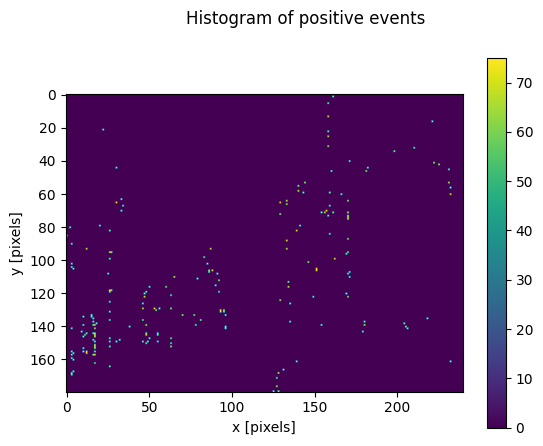

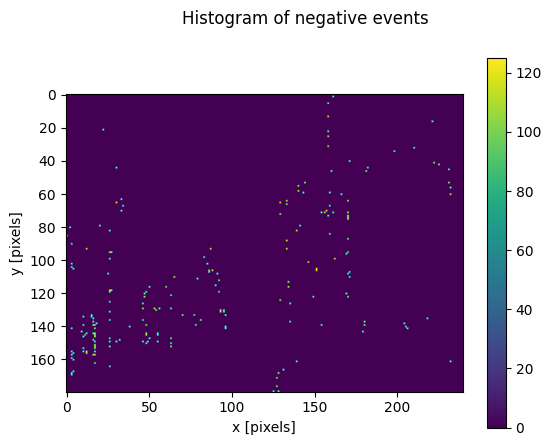

In [24]:
# we have 250 partitions, each one has 200 events, events maybe have pos or negative polarity
img_size = (180,240)
img_pos = np.zeros(img_size)
img_neg = np.zeros(img_size)

for e in partitions[0]:
  for i in range(200):
      if (e[3] > 0):
          img_pos[y[i],x[i]] += 1 # count events
      else:
          img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

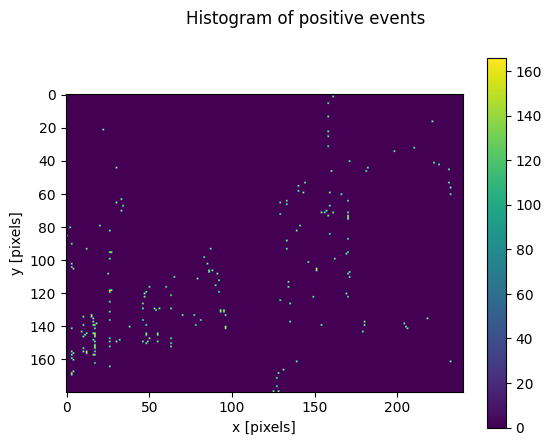

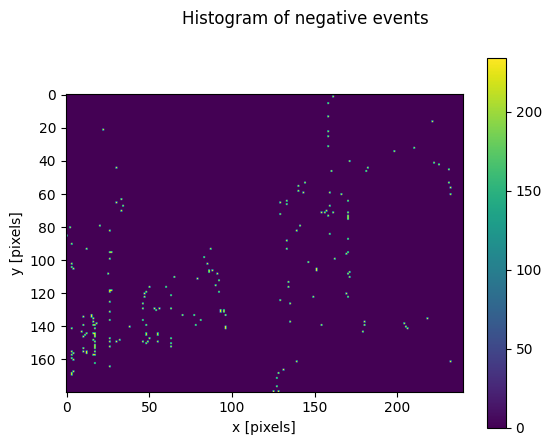

In [25]:
for e in partitions[1]:
  for i in range(200):
      if (e[3] > 0):
          img_pos[y[i],x[i]] += 1 # count events
      else:
          img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

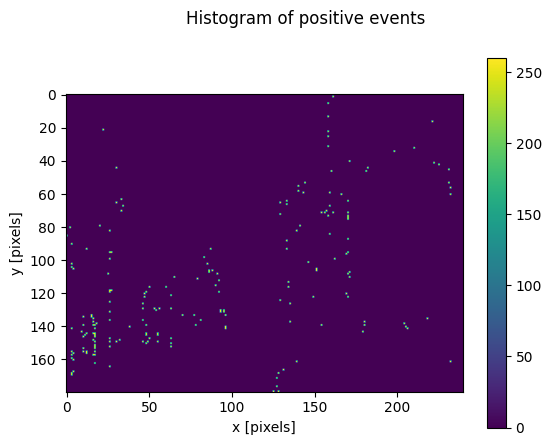

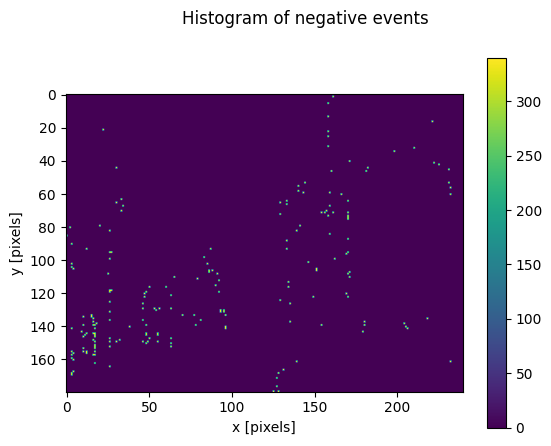

In [26]:
for e in partitions[-1]:
  for i in range(200):
      if (e[3] > 0):
          img_pos[y[i],x[i]] += 1 # count events
      else:
          img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

# Plot an Event frame

    If we consider an image, each pixel has a polarity (1, 0, -1)

In [10]:
# skip the timestamps, consider an 2-D image
# create an image with spatial resolution of (x, y)
# polarity is the pixel's value

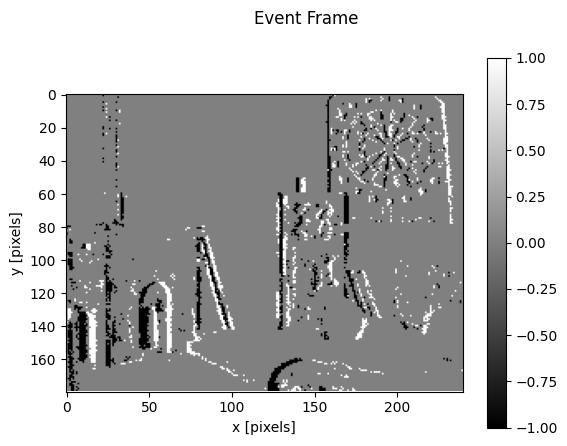

In [7]:
img = np.zeros(shape=Spatial_size, dtype=int)

for i in range(num_events):
        img[y[i], x[i]] = (2*p[i]-1)

# draw image
fig = plt.figure()
fig.suptitle('Event Frame')
plt.imshow(img, cmap='gray')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.savefig('event_frame.jpg')
plt.show()

# Accumulate Frame

In [ ]:
# Now, consider the real spatial size of the event camera which is 180*240
# then accumulate all the frames

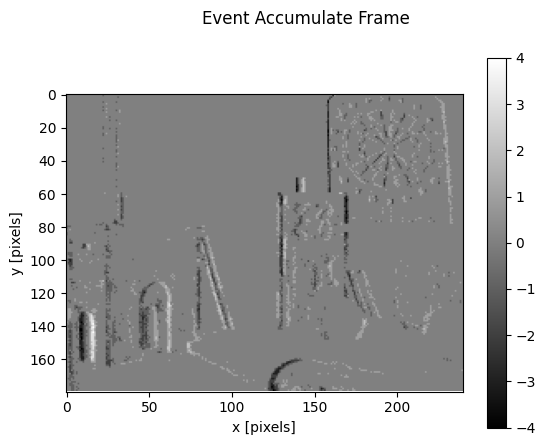

In [11]:
camera_size = (180,240)
num_events = 5000
img = np.zeros(shape=camera_size, dtype=int)

for i in range(num_events):
    img[y[i], x[i]] += (2*p[i]-1)

# draw image
fig = plt.figure()
fig.suptitle('Event Accumulate Frame')
plt.imshow(img, cmap='gray')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.savefig('event_accumulate_frame.jpg')
plt.show()

# 3-D Grid

In [ ]:
# Consider timestamps as a third dimension

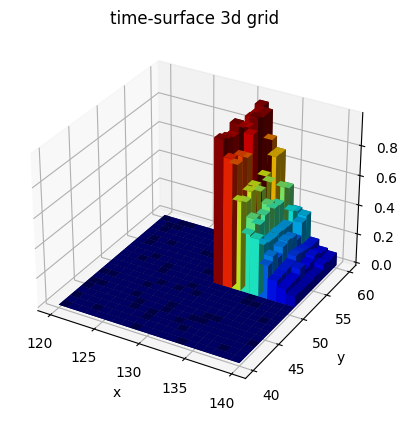

In [12]:
camera_size = (180,240)
img = np.zeros(shape=camera_size, dtype=int)

# parameters for Time Surface
t_ref = ts[-1]      # 'current' time
tau = 50e-3         # 50ms

sae = np.zeros(camera_size, np.float32)

# calculate timesurface using expotential decay
for i in range(len(ts)):
    if(p[i] == 0):          # only for negative ts.
        sae[y[i], x[i]] = np.exp(-(t_ref-ts[i]) / tau)

# select a roi, to avoid to much data.
roi_x0 = 120
roi_x1 = 140
roi_y0 = 40
roi_y1 = 60
x_range = np.arange(roi_x0, roi_x1)
y_range = np.arange(roi_y0, roi_y1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(x_range, y_range)
x, y = xx.ravel(), yy.ravel()

top = sae[roi_y0:roi_y1, roi_x0:roi_x1].ravel()
colors = plt.cm.jet(top/np.max(top))                # color coding
bottom = np.zeros_like(top)

ax.bar3d(x, y, bottom, 1, 1, top, shade=True, color=colors)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('time-surface 3d grid')
plt.show()

# 2-D Histogram for Pos and Neg polarity events

In [14]:
def extract_data(filename):
    infile = open(filename, 'r')
    timestamp = []
    x = []
    y = []
    pol = []
    for line in infile:
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()
    return timestamp,x,y,pol

# Call the function to read data
timestamp, x, y, pol = extract_data("Sample.txt")

In [15]:
img_size = (180,240)
num_events = 5000

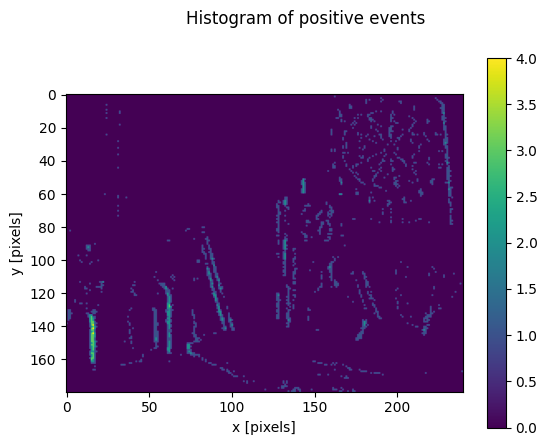

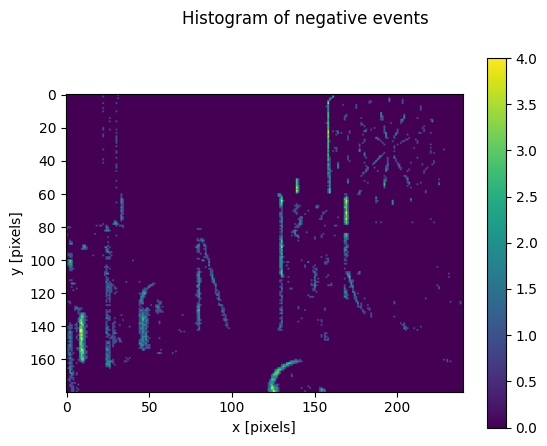

In [17]:
# %% 2D Histograms of events, split by polarity (positive and negative events in separate images)
img_pos = np.zeros(img_size)
img_neg = np.zeros(img_size)
for i in range(num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()